# <center>Structural Analysis and Visualization of Networks</center>

## <center>Home Assignment #4: Community Detection Algorithms

### <center>Student: *Mukhomorova Olga*</center>

#### <hr /> General Information

**Due Date:** 03.04.2016 23:59 <br \>
**Late submission policy:** the task will not be graded! <br \>


Please send your reports to <network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sc
import scipy.io
import operator
%matplotlib inline

### Task 1* (For those who have not done that during the seminar)

On this seminar your are asked to implement simple community detection algorightm. It is called [Markov Cluster Algorithm](http://micans.org/mcl/) (MCL).

Implement Markor Clustering Algorithm

**Input:** Transition matrix $T = D^{-1}A $

**Output:** Adjacency matrix $M^*$

1. Set $M = T$
2. **repeat:**
    3. *Expansion Step:* $M = M^p$ (usually $p=2$)
    4. *Inflation Step:* Raise every entry of $M$ to the power $\alpha$ (usualy $\alpha=2$)
    5. *Renormalize:* Normalize each row by its sum
    6. *Prunning:* Replace entries that are close to $0$ by pure $0$
7. **until** $M$ converges
8. $M^* = M$
<br\>
<br\>

As a result you should get a cluster matrix s.t. elements of the cluster correspont to nonzero elements of the columns of the matrix. 
<br\>
* Run this method for network [1](https://www.hse.ru/data/2016/03/15/1127695811/network1.mat), [2](https://www.hse.ru/data/2016/03/15/1127699956/network2.mat) and [3](https://www.hse.ru/data/2016/03/15/1127703057/network3.mat).
* Play with the parameters ($p$, $\alpha$, zero tolerance), analyse the results

<hr />


In [2]:
def MCL(A, tol, p, alpha):
    step = 1
    col_sums = A.sum(axis = 0)
    T = A / col_sums[np.newaxis, :]
    M = T
    while(1):
        step += 1
        # Expancion step:
        M1 = np.linalg.matrix_power(M, p)
        # Inflation step:
        M1 = np.power(M1, alpha)
        col_sums = M1.sum(axis = 0)
        M1 = M1 / col_sums[np.newaxis, :]
        M1[M1<=tol] = 0
        if np.linalg.norm(M - M1) == 0:
            print step-1, 'steps'
            return M1
        else:
            M = M1.copy()

In [3]:
def show_graph(adjacency_matrix, comm):
    # given an adjacency matrix use networkx and matlpotlib to plot the graph
    import networkx as nx
    import matplotlib.pyplot as plt

    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    pos = nx.spring_layout(gr, scale = 5, iterations=100)
    nx.draw(gr, 
            pos, 
            node_color=comm,
           with_labels=True,
           font_color='k')

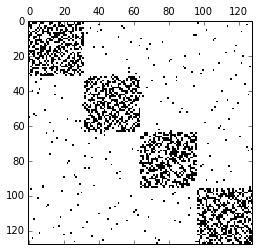

In [4]:
#network1
data = scipy.io.loadmat('network1.mat')
A = data['A'].astype('float')
plt.spy(A)
comm=data['Comm']

16 steps
13 steps
5 steps


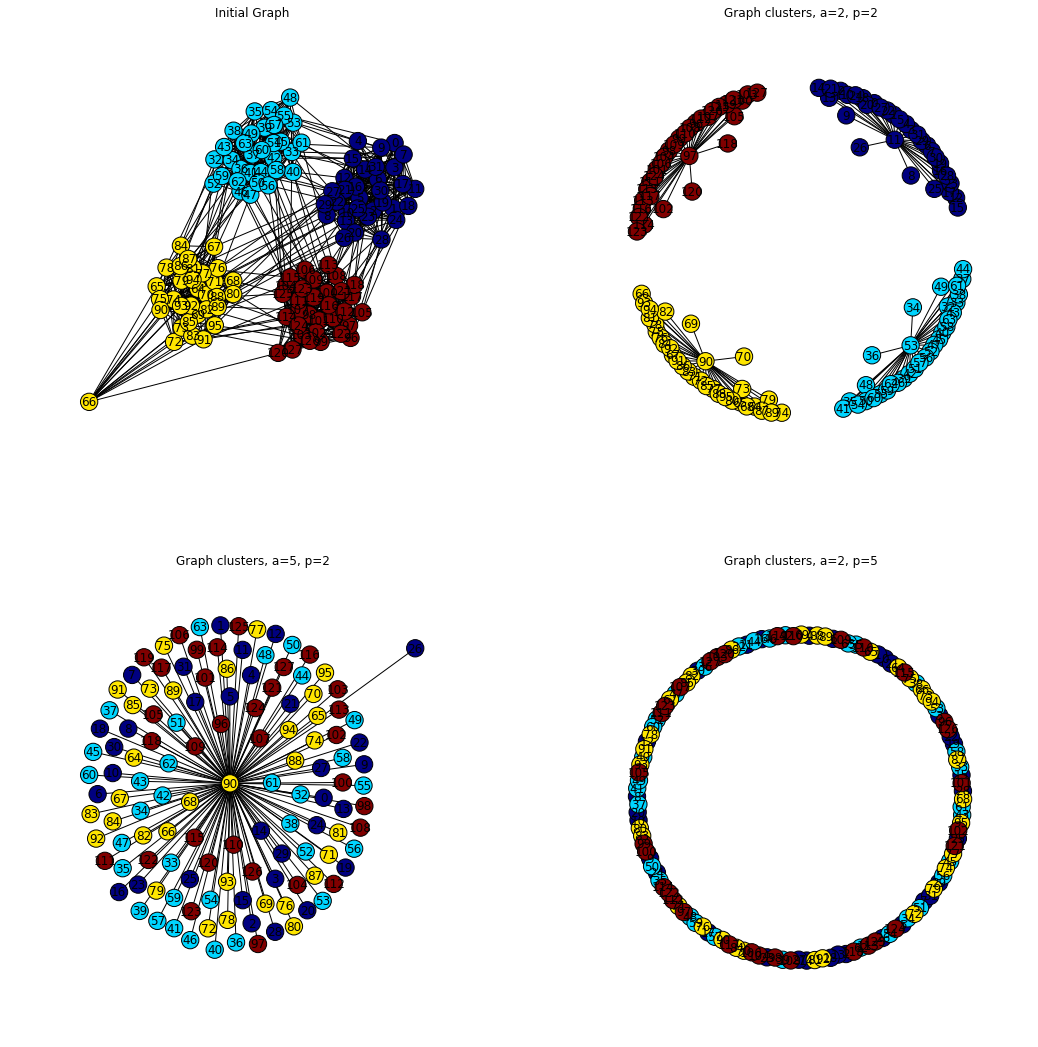

In [5]:
plt.figure(1,figsize=(18,18))
plt.subplot(221)
plt.title('Initial Graph')
show_graph(A, comm)
plt.subplot(222)
plt.title('Graph clusters, a=2, p=2')
show_graph(MCL(A, 0.0001, 2,2), comm)
plt.subplot(223)
plt.title('Graph clusters, a=5, p=2')
show_graph(MCL(A, 0.0001, 5,2), comm)
plt.subplot(224)
plt.title('Graph clusters, a=2, p=5')
show_graph(MCL(A, 0.0001, 2,5), comm)

If we change parameters **a, p, tol** we will get different graphs:
- if **tol** is small (0.0001), we need to make more steps for M to converge; if **tol** is not very small (0.1), we need less steps

- if **a** is bigger than 2 (for ex. 5), then elements of M (connections)  that are <1 are more likely to fade and we will finally get one big cluster (in other words we favour *prefered neighbours* and demote less popular neighbours with raising every entry of M to the power greater than 1)

- expansion parameter **p** corresponds to computing random walks of higher length (with many steps). If M is in some matrix power **p** then this matrix corresponds to connections between nodes of length p. if **p** is high, we get more 'long' connections

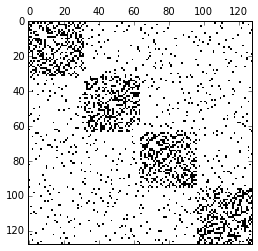

In [6]:
#network2
data = scipy.io.loadmat('network2.mat')
A = data['A'].astype('float')
plt.spy(A)
comm=data['Comm']

15 steps
18 steps
4 steps


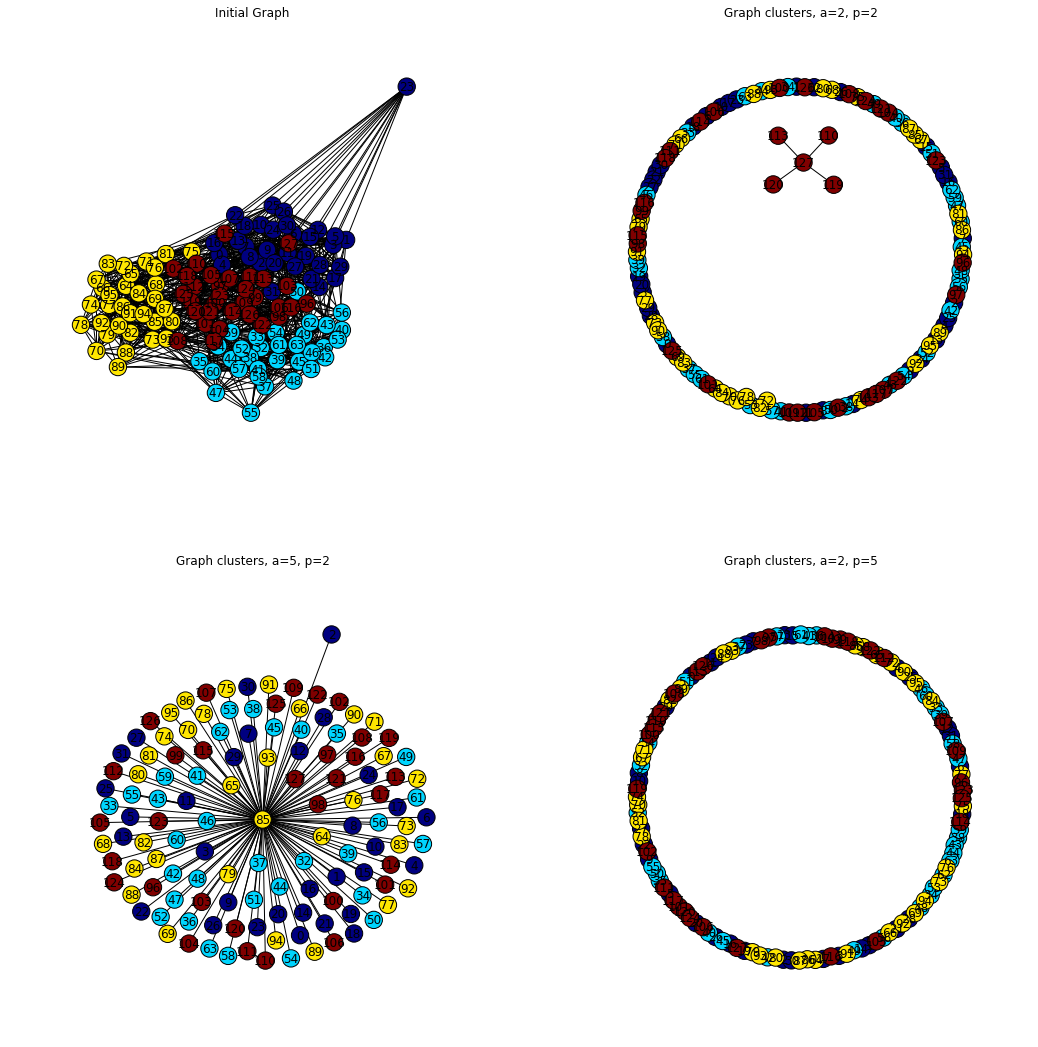

In [7]:
plt.figure(1,figsize=(18,18))
plt.subplot(221)
plt.title('Initial Graph')
show_graph(A,comm)
plt.subplot(222)
plt.title('Graph clusters, a=2, p=2')
show_graph(MCL(A, 0.0001, 2,2),comm)
plt.subplot(223)
plt.title('Graph clusters, a=5, p=2')
show_graph(MCL(A, 0.0001, 5,2),comm)
plt.subplot(224)
plt.title('Graph clusters, a=2, p=5')
show_graph(MCL(A, 0.0001, 2,5),comm)

We can see, that there is no obvious communities and algorithm cant find them

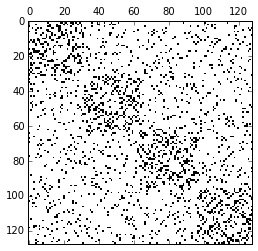

In [8]:
#network3
data = scipy.io.loadmat('network3.mat')
A = data['A'].astype('float')
plt.spy(A)
comm=data['Comm']

14 steps
18 steps
4 steps


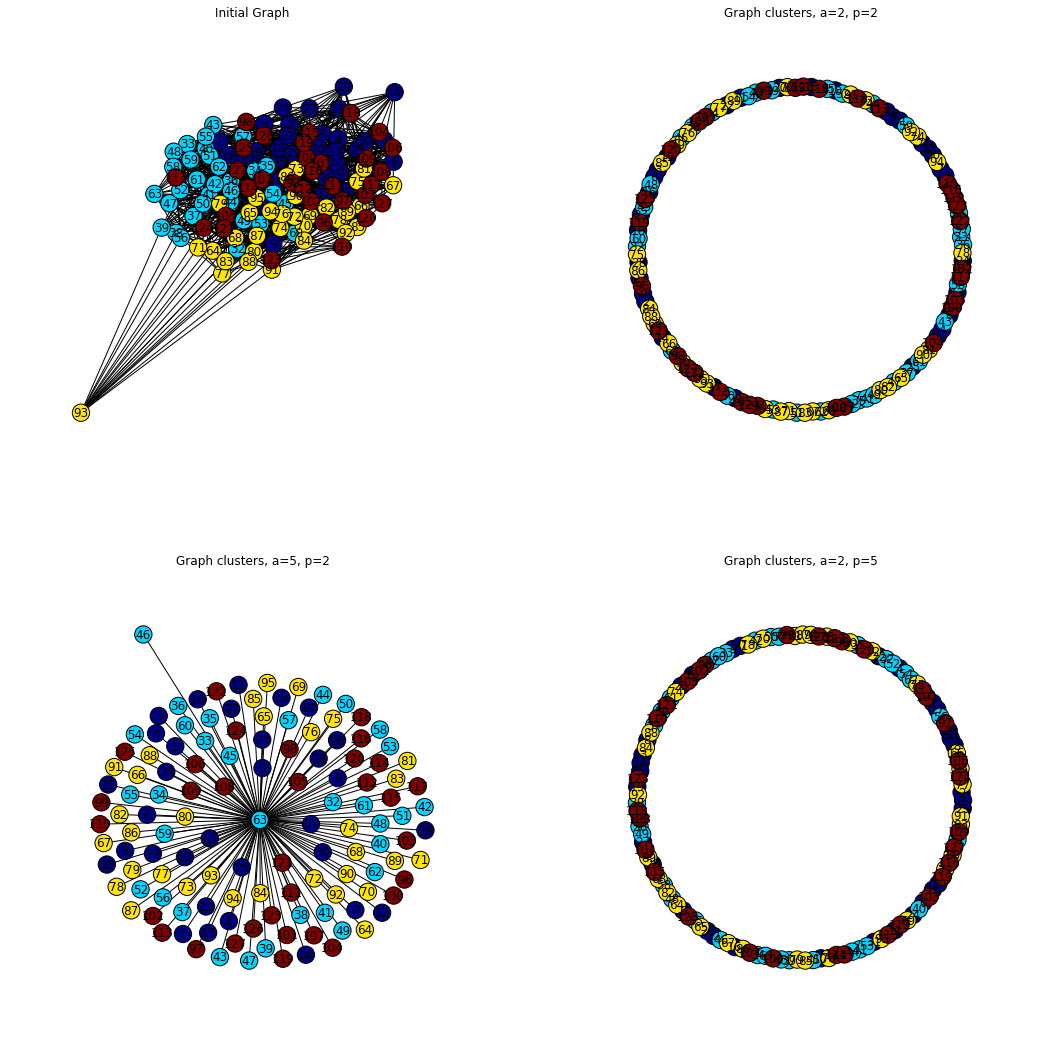

In [9]:
plt.figure(1,figsize=(18,18))
plt.subplot(221)
plt.title('Initial Graph')
show_graph(A,comm)
plt.subplot(222)
plt.title('Graph clusters, a=2, p=2')
show_graph(MCL(A, 0.0001, 2,2),comm)
plt.subplot(223)
plt.title('Graph clusters, a=5, p=2')
show_graph(MCL(A, 0.0001, 5,2),comm)
plt.subplot(224)
plt.title('Graph clusters, a=2, p=5')
show_graph(MCL(A, 0.0001, 2,5),comm)

*network3* is even more tightly connected and shuffled network

### Task 2

Load [Yahoo Music network](https://www.hse.ru/data/2016/03/15/1127704844/music_data.mat). Edges in this network appear if enough number of users have given ratings to both music bands. Note, that edges are weighted with similarity of the ratings.

* Implement *multilevel spectral recursive partitioning* algorithm that was described during the lecture
* Visualize community structure of the network and output some of the dense clusters (with interpretation, if you can)

You can load .mat files with the following commands:

In [27]:
import scipy.io

data = scipy.io.loadmat('music_data.mat')

In [28]:
A=data['A']

In [29]:
def density(M):
    n = M.shape[0]
    if n == 1:
        return 1
    return len(M.nonzero()[0]) / (1.* n * (n-1))

def SRP(A):
    D = np.diagflat(A.sum(axis = 1))
    D = scipy.sparse.csr_matrix(D)
    L = D-A
    eig_val, eig_vec = scipy.sparse.linalg.eigsh(L, k=2,  M = D, which = 'SM')
    ev = [i[1] for i in eig_vec]
    s = np.sign([i[1] for i in eig_vec])
    d=dict(zip(range(0, len(ev)), [i[1] for i in eig_vec]))
    sorted_dict = sorted(d.items(), key=operator.itemgetter(1))
    reorder=[i[0] for i in sorted_dict]
    A=A[reorder,][:,reorder]
    v1 = [i[0] for i in sorted_dict if i[1]<0] #class -
    v2 = [i[0] for i in sorted_dict if i[1]>=0] #class +
    i=len(v1)
    #print len(v1), len(v2)
    if density(A[:i, :i]) < .8 and len(v1)>100:
        A[:i,:i], nr = SRP(A[:i,:i])
        reorder[:i] = [reorder[:i][j] for j in nr]
    if density(A[i:, i:]) < .8 and len(v2)>100:
        A[i:,i:], nr = SRP(A[i:,i:])
        reorder[i:] = [reorder[i:][j] for j in nr]
    return A, reorder

In [30]:
B=A.tolil()

In [31]:
A_fin, r_fin = SRP(B)

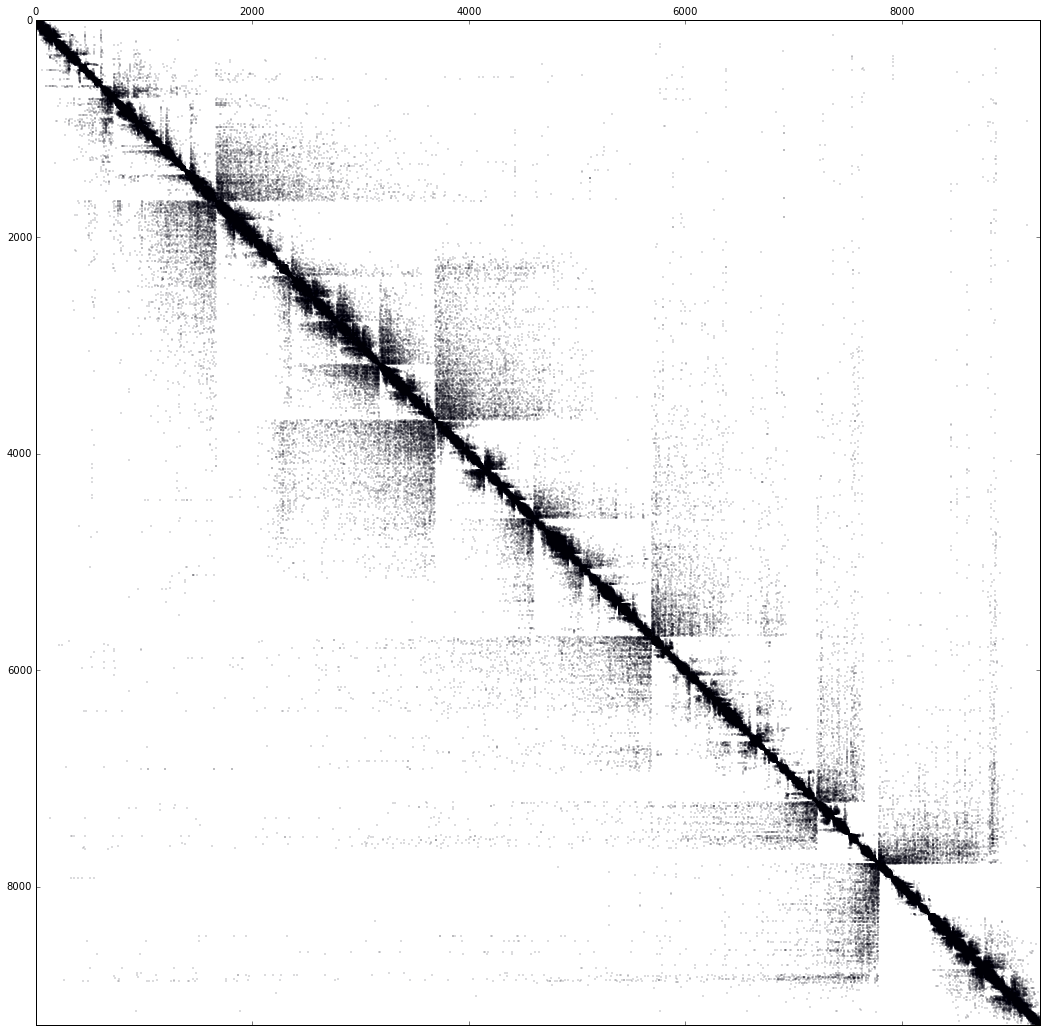

In [32]:
plt.figure(1,figsize=(18,18))
plt.spy(A_fin, markersize=0.2)